# Feature Ranking using Random Forest for Prediction of Casuality Severity

#### Name: Lakhmi Priya
#### Thesis Title: Visualizing and Predicting Accident Severity In UK.

##### Neccesary Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#####  Loading Clean Dataset

In [4]:
raw_df = pd.read_csv('clean_filtered_data.csv') 
raw_df

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,...,casualty_type,vehicle_type,vehicle_manoeuvre,junction_location,vehicle_leaving_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,driver_home_area_type
0,3,3,1,6,6,30,9,4,4,7,...,9,9,17,1,0,1,6,1,19,1
1,3,3,1,6,6,30,9,4,4,7,...,9,9,2,1,0,1,6,3,-1,-1
2,3,3,1,6,6,30,9,4,4,7,...,9,9,2,1,0,2,6,3,-1,-1
3,2,2,3,6,3,30,7,2,4,1,...,9,9,18,8,0,1,6,1,32,-1
4,2,2,3,6,3,30,7,2,4,1,...,9,9,18,8,0,1,6,1,32,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102342,2,2,1,2,7,30,0,-1,1,1,...,5,5,16,0,0,2,2,1,50,1
102343,3,2,1,1,6,20,0,-1,1,1,...,11,11,18,0,0,4,1,1,52,1
102344,3,2,1,1,6,20,0,-1,1,1,...,11,11,3,0,0,3,1,1,46,1
102345,2,1,1,2,6,60,0,-1,1,1,...,5,5,13,0,8,0,5,1,57,2


#####  Preparing X and Y dataset

In [5]:
X = raw_df.loc[:, raw_df.columns != 'accident_severity']
X

,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,...,casualty_type,vehicle_type,vehicle_manoeuvre,junction_location,vehicle_leaving_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,driver_home_area_type
0,3,1,6,6,30,9,4,4,7,4,...,9,9,17,1,0,1,6,1,19,1
1,3,1,6,6,30,9,4,4,7,4,...,9,9,2,1,0,1,6,3,-1,-1
2,3,1,6,6,30,9,4,4,7,4,...,9,9,2,1,0,2,6,3,-1,-1
3,2,3,6,3,30,7,2,4,1,1,...,9,9,18,8,0,1,6,1,32,-1
4,2,3,6,3,30,7,2,4,1,1,...,9,9,18,8,0,1,6,1,32,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102342,2,1,2,7,30,0,-1,1,1,1,...,5,5,16,0,0,2,2,1,50,1
102343,2,1,1,6,20,0,-1,1,1,1,...,11,11,18,0,0,4,1,1,52,1
102344,2,1,1,6,20,0,-1,1,1,1,...,11,11,3,0,0,3,1,1,46,1
102345,1,1,2,6,60,0,-1,1,1,1,...,5,5,13,0,8,0,5,1,57,2


In [6]:
X.columns

Index(['number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'casualty_class',
       'casualty_type', 'vehicle_type', 'vehicle_manoeuvre',
       'junction_location', 'vehicle_leaving_carriageway',
       'first_point_of_impact', 'journey_purpose_of_driver', 'sex_of_driver',
       'age_of_driver', 'driver_home_area_type'],
      dtype='object')

In [7]:
y = raw_df[["accident_severity"]].copy()
y

,accident_severity
0,3
1,3
2,3
3,2
4,2
...,...
102342,2
102343,3
102344,3
102345,2


In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

#####  Scaling of the dataset

In [9]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Random forest Feature Ranking 

In [10]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(X_train_scaled,y_train)

#Prediction
y_pred=clf.predict(X_test_scaled)

/var/folders/1_/6hsrrkx96257q7yqr1brdlxm0000gn/T/ipykernel_3011/1095160265.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_scaled,y_train)


In [11]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8559881569207994


In [12]:
clf.feature_importances_

array([0.04744421, 0.04645689, 0.09514323, 0.03092288, 0.05098267,
       0.04382824, 0.02210745, 0.02912697, 0.02863072, 0.02892547,
       0.00921977, 0.00782164, 0.01541873, 0.05237568, 0.04235575,
       0.06758803, 0.04245751, 0.02861814, 0.05042103, 0.04464854,
       0.02647443, 0.15050681, 0.03852522])

In [13]:
x_names = X.columns

## Feature Ranking

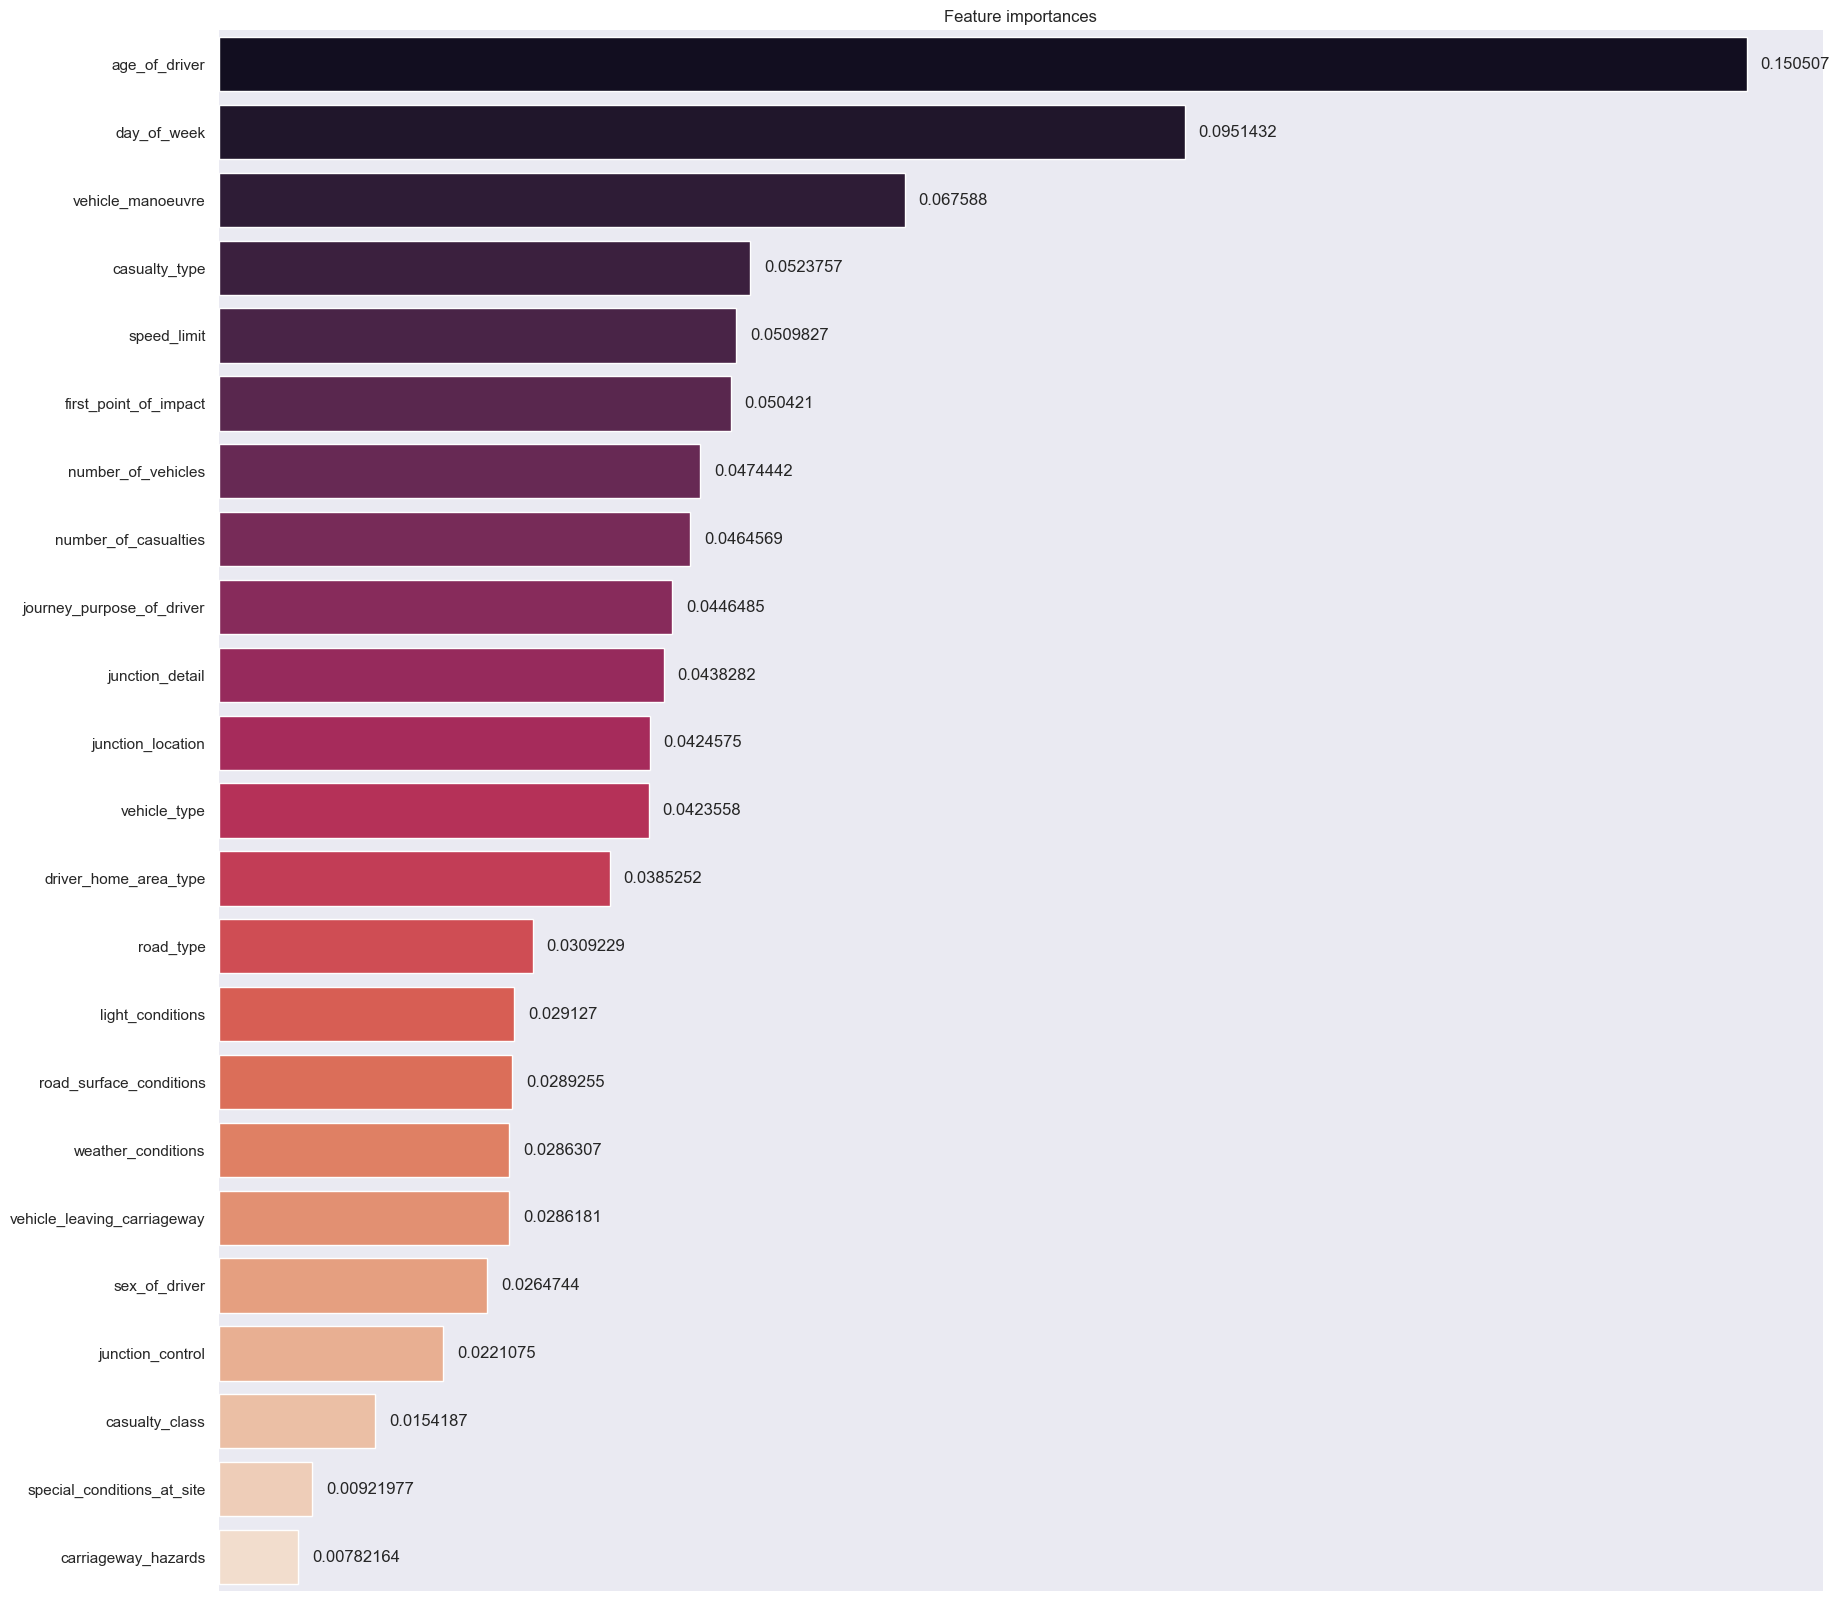

In [14]:
features_df = pd.DataFrame({'features': x_names, 'importances': clf.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

sns.set(rc={'figure.figsize':(20.7,20.27)})

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=10)

In [15]:
results = raw_df.corrwith(raw_df["accident_severity"])

In [16]:
results.sort_values()

speed_limit                   -0.143632
number_of_casualties          -0.123104
age_of_driver                 -0.071054
driver_home_area_type         -0.064780
light_conditions              -0.060657
casualty_class                -0.049034
casualty_type                 -0.041722
vehicle_type                  -0.033456
number_of_vehicles            -0.026601
road_type                     -0.017644
day_of_week                    0.005880
journey_purpose_of_driver      0.023095
road_surface_conditions        0.027640
carriageway_hazards            0.036963
special_conditions_at_site     0.043141
weather_conditions             0.046960
vehicle_leaving_carriageway    0.049777
junction_detail                0.065800
junction_location              0.075110
sex_of_driver                  0.077021
first_point_of_impact          0.079195
junction_control               0.080522
vehicle_manoeuvre              0.084830
accident_severity              1.000000
dtype: float64

<AxesSubplot:>

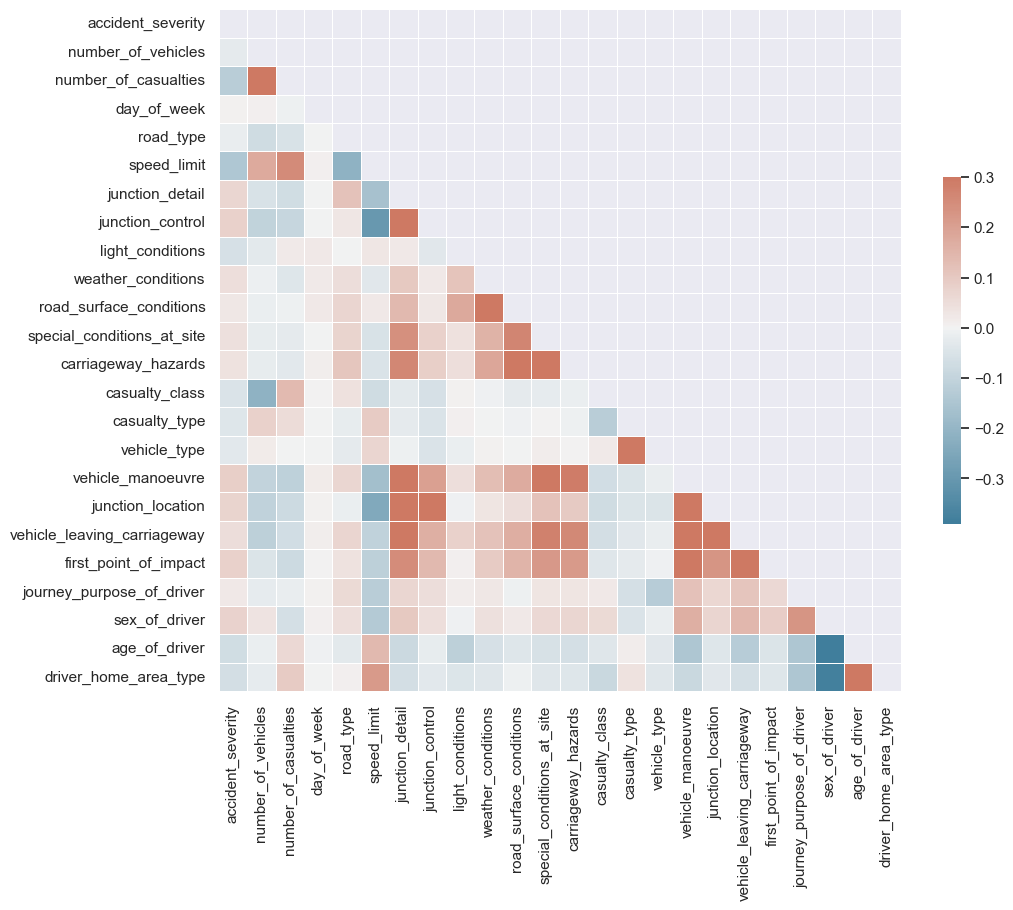

In [17]:
# Compute the correlation matrix
corr = raw_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
pearsoncorr = raw_df.corr(method='pearson')
pearsoncorr

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,...,casualty_type,vehicle_type,vehicle_manoeuvre,junction_location,vehicle_leaving_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,driver_home_area_type
accident_severity,1.000000,-0.026601,-0.123104,0.005880,-0.017644,-0.143632,0.065800,0.080522,-0.060657,0.046960,...,-0.041722,-0.033456,0.084830,0.075110,0.049777,0.079195,0.023095,0.077021,-0.071054,-0.064780
number_of_vehicles,-0.026601,1.000000,0.328253,0.008568,-0.073369,0.176301,-0.053369,-0.104497,-0.031213,-0.012122,...,0.079892,0.016163,-0.101511,-0.107684,-0.113021,-0.045658,-0.022884,0.034379,-0.014836,-0.021348
number_of_casualties,-0.123104,0.328253,1.000000,-0.007256,-0.054623,0.253430,-0.070182,-0.092956,0.019048,-0.040707,...,0.052537,0.000069,-0.109784,-0.080313,-0.067655,-0.081119,-0.017128,-0.062794,0.061697,0.094051
day_of_week,0.005880,0.008568,-0.007256,1.000000,-0.000737,0.006781,-0.000937,-0.001016,0.023525,0.018675,...,-0.003474,-0.000721,0.014894,0.004939,0.010794,0.000905,0.003767,0.007008,-0.004668,-0.002473
road_type,-0.017644,-0.073369,-0.054623,-0.000737,1.000000,-0.214459,0.117762,0.028707,-0.000539,0.050081,...,-0.019284,-0.024428,0.067126,-0.013192,0.070216,0.036748,0.059046,0.049376,-0.030084,0.007097
speed_limit,-0.143632,0.176301,0.253430,0.006781,-0.214459,1.000000,-0.162544,-0.299872,0.029339,-0.036322,...,0.093080,0.071385,-0.171956,-0.246862,-0.108411,-0.114437,-0.123528,-0.132575,0.142916,0.217738
junction_detail,0.065800,-0.053369,-0.070182,-0.000937,0.117762,-0.162544,1.000000,0.437713,0.021467,0.101370,...,-0.026509,-0.007349,0.447657,0.350330,0.391060,0.249330,0.067733,0.102860,-0.083037,-0.063869
junction_control,0.080522,-0.104497,-0.092956,-0.001016,0.028707,-0.299872,0.437713,1.000000,-0.036790,0.020520,...,-0.048292,-0.051404,0.202950,0.630884,0.163870,0.141737,0.050614,0.046779,-0.019699,-0.031919
light_conditions,-0.060657,-0.031213,0.019048,0.023525,-0.000539,0.029339,0.021467,-0.036790,1.000000,0.112124,...,0.008566,-0.013761,0.049019,-0.005734,0.080573,0.006550,0.013810,-0.005022,-0.113030,-0.042733
weather_conditions,0.046960,-0.012122,-0.040707,0.018675,0.050081,-0.036322,0.101370,0.020520,0.112124,1.000000,...,-0.004421,0.003839,0.129791,0.030809,0.114711,0.095221,0.025560,0.043002,-0.059427,-0.037519


<AxesSubplot:>

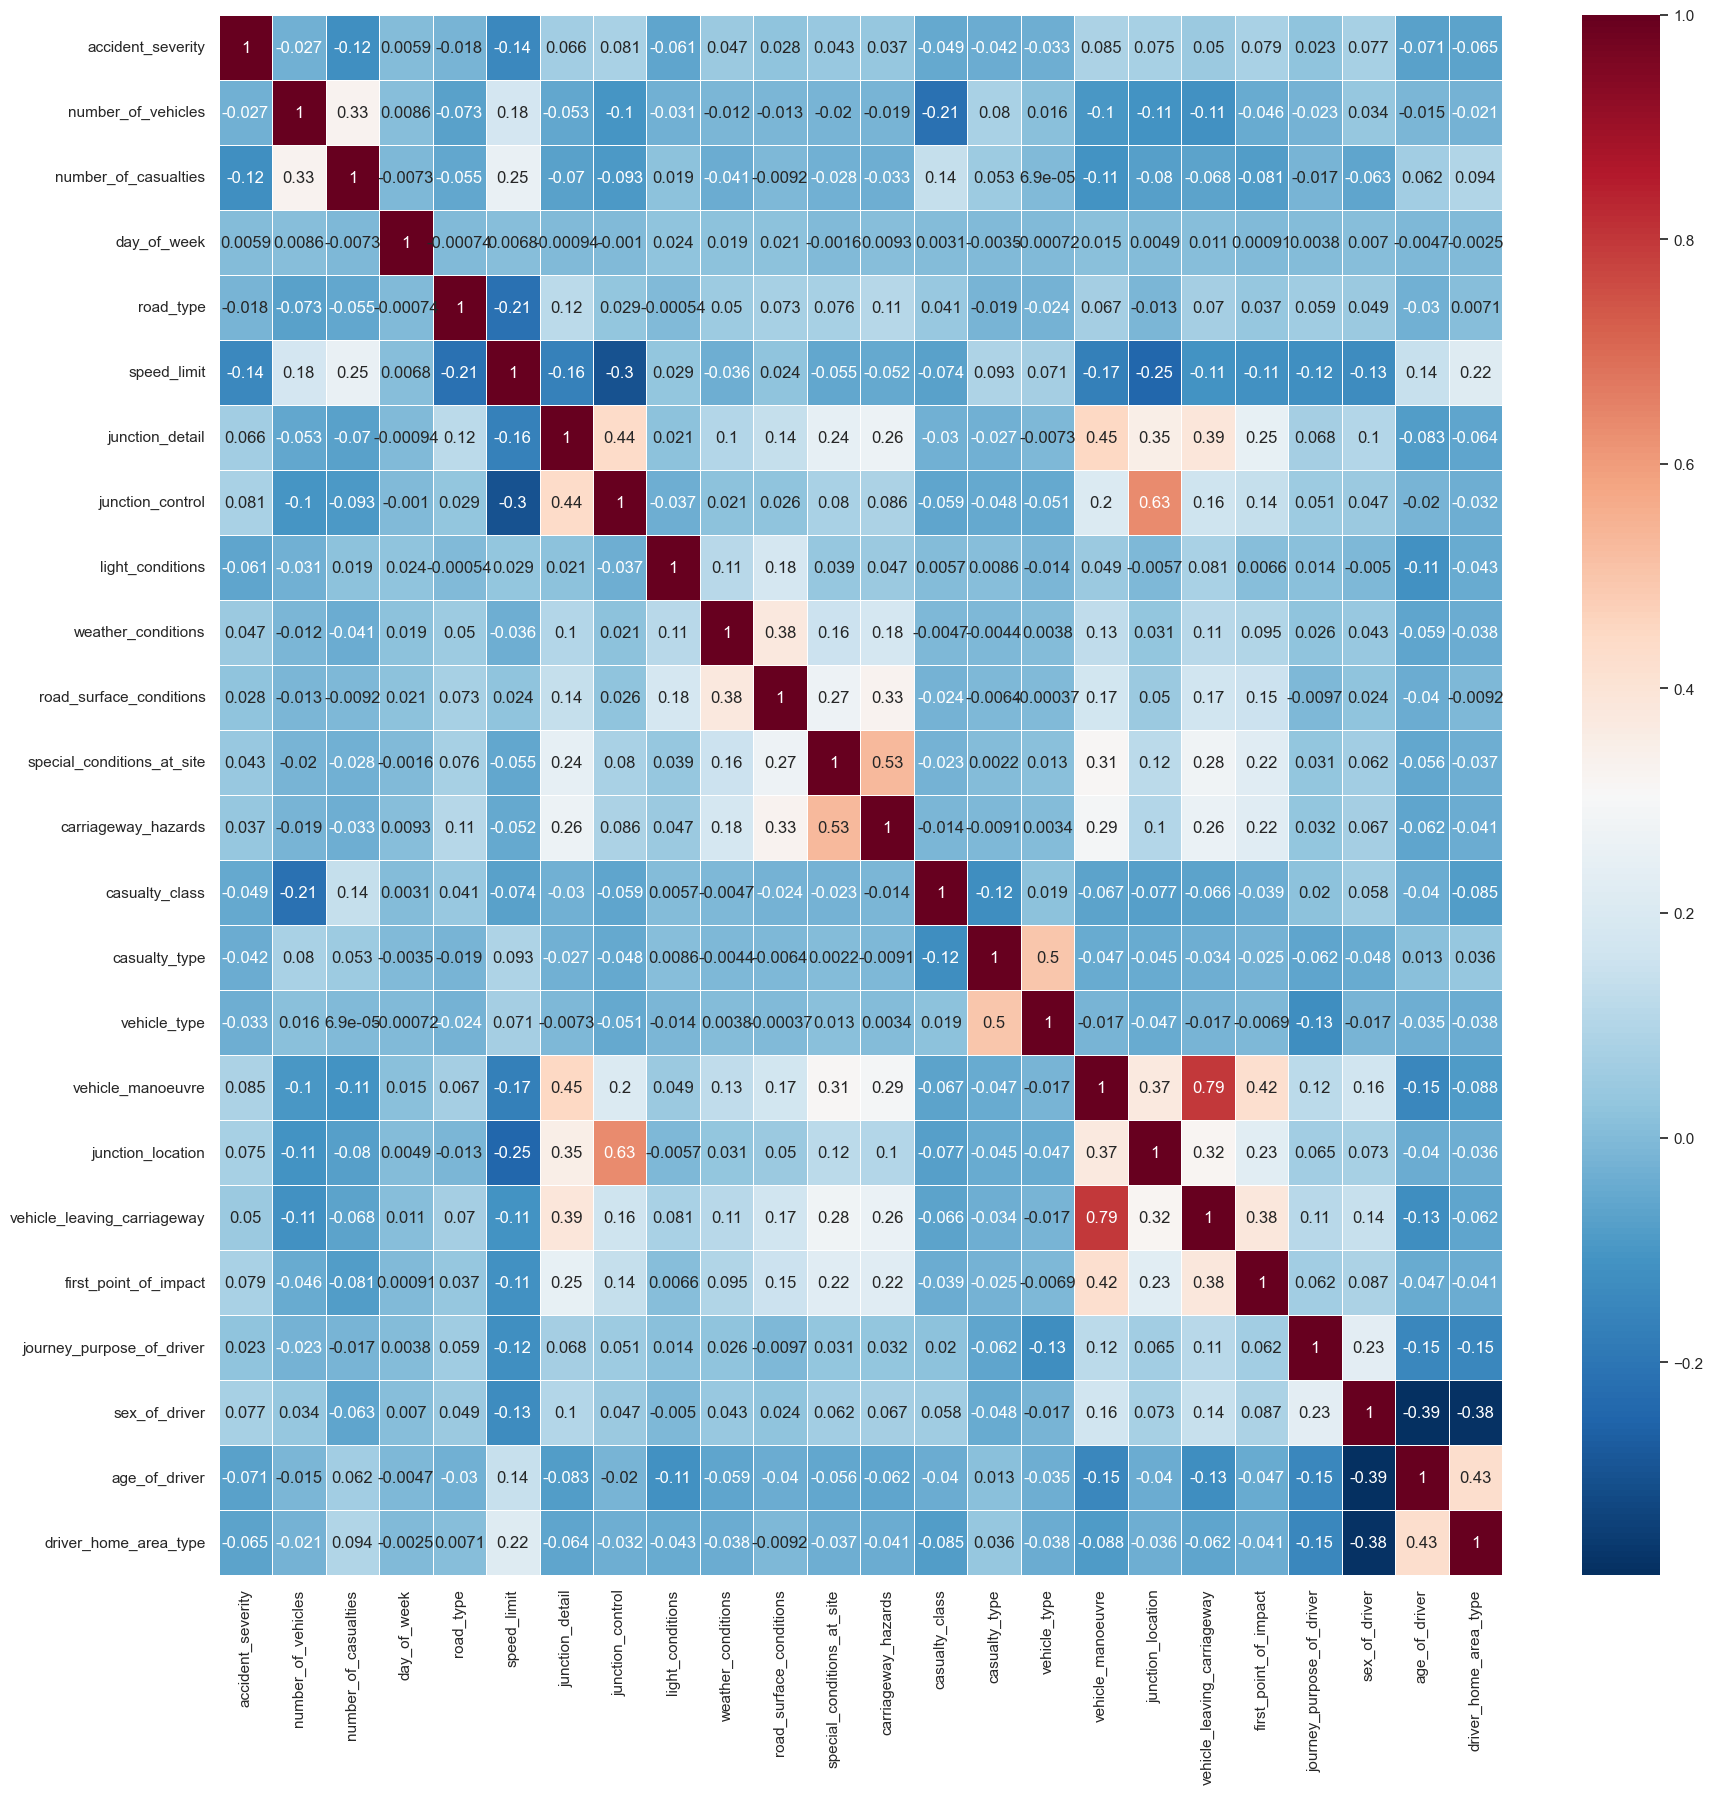

In [19]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)